In [49]:
# Import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Import Warnings 
import warnings
import keras
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
# Import tensorflow as the backend for Keras
from keras import backend as K
K.set_image_data_format('channels_last')
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard
# Import required libraries for cnfusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools



In [50]:
PATH = os.getcwd()
# Define data path
data_path = '../../datasets/objects2/data'
data_dir_list = os.listdir(data_path)
data_dir_list

['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']

In [51]:
img_rows=128
img_cols=128
num_channel=1
num_epoch=100
# Define the number of classes
num_classes = 7
img_data_list=[]
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        #print(img)
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

Loaded the images of dataset-bike

Loaded the images of dataset-cars

Loaded the images of dataset-cats

Loaded the images of dataset-dogs

Loaded the images of dataset-flowers

Loaded the images of dataset-horses

Loaded the images of dataset-human

(1803, 128, 128)


In [52]:
if num_channel==1:
    print(keras.backend.image_data_format())
    if keras.backend.image_data_format()=='channels_first':
        img_data= np.expand_dims(img_data, axis=1) 
        print (img_data.shape)
    else:
        print(img_data.shape)
        img_data= np.expand_dims(img_data, axis=3) 
        print (img_data.shape)
        
else:
    if keras.backend.image_data_format()=='channels_first':
        img_data=np.rollaxis(img_data,3,1)
        print(img_data.shape)

channels_last
(1803, 128, 128)
(1803, 128, 128, 1)


In [74]:
#Assigning Labels & define the number of classes

num_classes = 7
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
labels[0:365]=0
labels[365:567]=1
labels[567:987]=2
labels[987:1189]=3
labels[1189:1399]=4
labels[1399:1601]=5
labels[1601:1803]=6
names = ['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']

In [75]:
#Convert class labels to on-hot encoding

Y = np_utils.to_categorical(labels, num_classes)


In [55]:
#Shuffle and Split the dataset

x,y = shuffle(img_data,Y, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [56]:
print("X_train shape = {}".format(X_train.shape))
print("X_test shape = {}".format(X_test.shape))

X_train shape = (1442, 128, 128, 1)
X_test shape = (361, 128, 128, 1)


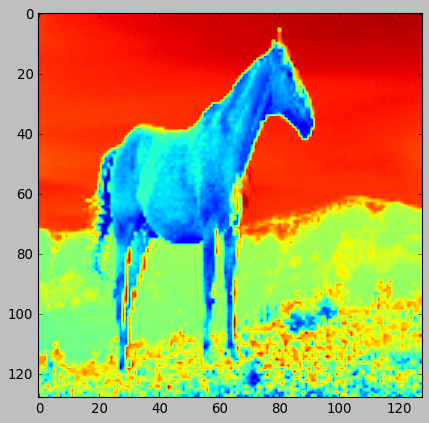

In [57]:

image = X_train[1203,:].reshape((128,128))
plt.imshow(image)
plt.show()

In [71]:
#designing and training a CNN model in keras

input_shape = img_data[0].shape

cnn_model = Sequential([
    Convolution2D(32,3,3,padding ='same',activation='relu',input_shape = input_shape),
    Convolution2D(32,3,3,activation='relu'),
    MaxPooling2D(pool_size=(2,2)) ,
    
    Dropout(0.5),
    Flatten(), 
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(128,activation='relu'),
    Dense(num_classes,activation = 'softmax')
])

In [72]:
#compiling the mosdel

cnn_model.compile(loss= 'categorical_crossentropy', 
                    optimizer= 'adadelta',
                     metrics= ["accuracy"])

In [73]:
cnn_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 43, 43, 32)        320       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 1, 1, 64)          36928     
_________________________________________________________________
dropout_24 (Dropout)         (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 64)              

In [66]:
hist = cnn_model.fit(X_train, y_train, batch_size= 16 ,
                     epochs= num_epoch, verbose= 1,
                     validation_data= (X_test, y_test)
                    )
#print(hist.history)
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc= hist.history['val_accuracy']
xc = range(num_epoch)
                     
                     
                     
                     

2021-09-11 18:45:35.463814: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 94502912 exceeds 10% of free system memory.


Epoch 1/100
91/91 [==============================] - 1s 11ms/step - loss: 1.9442 - accuracy: 0.1720 - val_loss: 1.9448 - val_accuracy: 0.1773
Epoch 2/100
91/91 [==============================] - 1s 11ms/step - loss: 1.9435 - accuracy: 0.1949 - val_loss: 1.9447 - val_accuracy: 0.1856
Epoch 3/100
91/91 [==============================] - 1s 10ms/step - loss: 1.9430 - accuracy: 0.1810 - val_loss: 1.9446 - val_accuracy: 0.1911
Epoch 4/100
91/91 [==============================] - 1s 10ms/step - loss: 1.9425 - accuracy: 0.1872 - val_loss: 1.9445 - val_accuracy: 0.1939
Epoch 5/100
91/91 [==============================] - 1s 10ms/step - loss: 1.9427 - accuracy: 0.1845 - val_loss: 1.9444 - val_accuracy: 0.1939
Epoch 6/100
91/91 [==============================] - 1s 10ms/step - loss: 1.9426 - accuracy: 0.1761 - val_loss: 1.9443 - val_accuracy: 0.1967
Epoch 7/100
91/91 [==============================] - 1s 10ms/step - loss: 1.9433 - accuracy: 0.1775 - val_loss: 1.9442 - val_accuracy: 0.1994
Epoch 

91/91 [==============================] - 1s 9ms/step - loss: 1.9339 - accuracy: 0.1886 - val_loss: 1.9379 - val_accuracy: 0.1911
Epoch 59/100
91/91 [==============================] - 1s 9ms/step - loss: 1.9348 - accuracy: 0.1928 - val_loss: 1.9378 - val_accuracy: 0.1939
Epoch 60/100
91/91 [==============================] - 1s 9ms/step - loss: 1.9344 - accuracy: 0.2171 - val_loss: 1.9377 - val_accuracy: 0.1939
Epoch 61/100
91/91 [==============================] - 1s 10ms/step - loss: 1.9325 - accuracy: 0.2330 - val_loss: 1.9375 - val_accuracy: 0.1967
Epoch 62/100
91/91 [==============================] - 1s 9ms/step - loss: 1.9332 - accuracy: 0.2087 - val_loss: 1.9374 - val_accuracy: 0.1994
Epoch 63/100
91/91 [==============================] - 1s 10ms/step - loss: 1.9339 - accuracy: 0.1997 - val_loss: 1.9373 - val_accuracy: 0.2050
Epoch 64/100
91/91 [==============================] - 1s 9ms/step - loss: 1.9342 - accuracy: 0.2074 - val_loss: 1.9371 - val_accuracy: 0.2050
Epoch 65/100
91/9

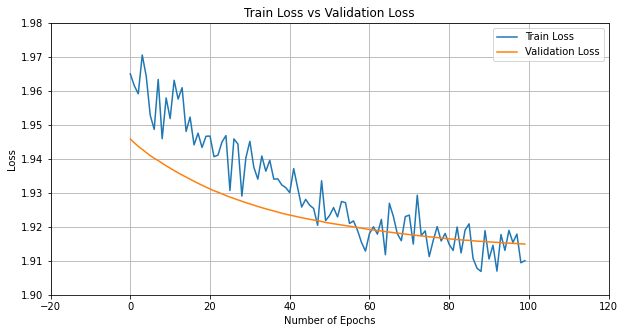

In [30]:
# plotting the loss and accuracy curve
plt.figure(1, figsize= (10, 5))
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs Validation Loss')
plt.grid(True)
plt.legend(['Train Loss', 'Validation Loss'])
plt.style.use(['classic'])


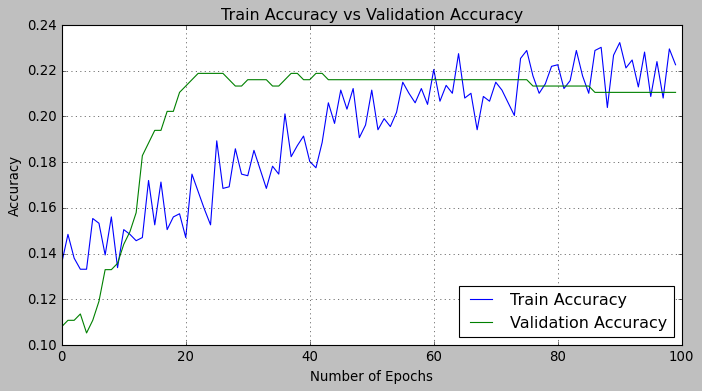

In [31]:
plt.figure(2,figsize=(10,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Validation Accuracy')
plt.grid(True)
plt.legend(['Train Accuracy','Validation Accuracy'],loc=4)
plt.style.use(['classic'])

In [32]:

score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 1.9149320125579834
Test Accuracy: 0.21052631735801697


In [39]:
test_image = X_test[0:1]
print(test_image.shape)
#plt.imshow(test_image)
#plt.show()
pre = cnn_model.predict(test_image)
print(cnn_model.predict(test_image))
#print(cnn_model.predict_classes(test_image))
print(np.argmax(pre, axis= 1))
print(y_test[0:1])

(1, 128, 128, 1)
[[0.17433694 0.12017269 0.19143398 0.1277062  0.124777   0.13910648
  0.1224667 ]]
[2]
[[1. 0. 0. 0. 0. 0. 0.]]


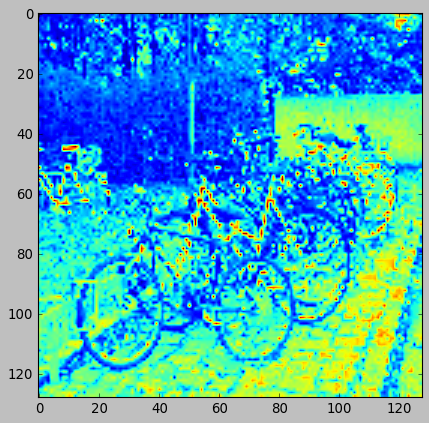

In [40]:
image = test_image.reshape((128,128))
plt.imshow(image)
plt.show()

In [41]:
test_img = cv2.imread('../../datasets/objects2/data/human/rider-104.jpg')
test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
test_img = cv2.resize(test_img,(128,128))
test_img = np.array(test_img)
test_img = test_img.astype('float32')
test_img /= 255
print(test_img.shape)

(128, 128)


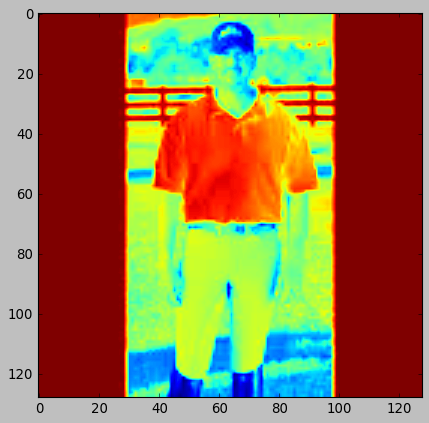

In [42]:

image = test_img.reshape((128,128))
plt.imshow(image)
plt.show()

In [46]:
print(num_channel)
print(keras.backend.image_data_format())
\

if num_channel==1:
    if keras.backend.image_data_format()=='channels_first':
        test_img= np.expand_dims(test_img, axis=0)
        test_img= np.expand_dims(test_img, axis=0)
        print (test_img.shape)
    else:
        test_img= np.expand_dims(test_img, axis=2) 
        test_img= np.expand_dims(test_img, axis=0)
        print (test_img.shape)

else:
    print(0)
    if keras.backend.image_data_format()=='channels_first':
        test_img=np.rollaxis(test_img,2,0)
        test_img= np.expand_dims(test_img, axis=0)
        print (test_img.shape)
    else:
        test_img= np.expand_dims(test_img, axis=0)
        print (test_img.shape)

# Predicting the test image
print((cnn_model.predict(test_img)))
pre = cnn_model.predict(test_img)
print(np.argmax(pre, axis= 1))

1
channels_last
(1, 128, 128, 1)
[[0.17700058 0.10425453 0.23993951 0.11074592 0.10293979 0.13005161
  0.13506797]]
[2]
